<a href="https://colab.research.google.com/github/harshadsable2615/Ai-internship/blob/main/Admission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Graduate Admission Prediction

Dataset Information:
    The dataset contains several parameters which are considered important during the application for Masters Programs.

Target Variable (y):
    Admit Status: Binary classification where 1 indicates a high chance of admission (Admitted) and 0 indicates a lower chance  

Features (X):

The following features are used to predict whether a student will get admission:

1. GRE Score

    Graduate Record Examination score (out of 340).         
2. TOEFL Score

    Test of English as a Foreign Language score (out of 120).
3. University Rating

    Rating of the university (1 to 5).
4. SOP

    Strength of Statement of Purpose (1 to 5).
5. LOR

    Strength of Letter of Recommendation (1 to 5).
6. CGPA

    Grade Point Average (out of 10).
7. Research

    Research experience:
    1 → Yes
    0 → No


Measures Given:
For the continuous academic characteristics (GRE, TOEFL, CGPA), the dataset provides:

1. Mean: The average score across the dataset.

2. Standard Deviation: The variation or dispersion of the scores.

3. Min/Max: The range of the lowest and highest scores recorded.

#Step1:

Imported Libraries

Imported libraries for data handling, visualization, and machine learning.

In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Step2:
Loaded dataset directly from GitHub link.

In [4]:

df = pd.read_csv("https://raw.githubusercontent.com/harshadsable2615/Ai-internship/refs/heads/main/Admission_Predict.csv")
df.head()



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#Step:3

Describe Dataset

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

#Step:4

Data Preprocessing Convert chance into 0 or 1 using threshold 0.75.

In [8]:

from sklearn.preprocessing import Binarizer

bi = Binarizer(threshold=0.75)
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])
df.head()



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


#Step:5

Features and Target, Split data into input features (X) and target (y).

In [9]:

X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit '].astype(int)



#Step:6

Visualization , Plot count of admission outcomes.

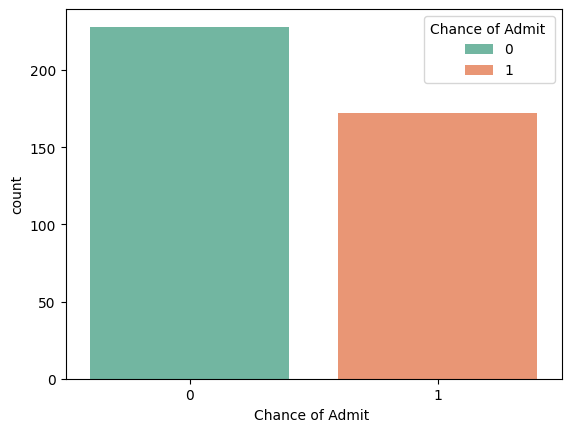

In [10]:


sns.countplot(x=y, hue=y, palette='Set2')
plt.show()



In [11]:
y.value_counts()

,count
Chance of Admit,
0,228
1,172


#Step:7

Train-Test Split, Split into training and testing data.

In [12]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)



#Step:8

Model Training, Train the Decision Tree Classifier.

In [13]:

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)





DecisionTreeClassifier(random_state=0)

#Step:9

Evaluation,Evaluate model performance using accuracy and confusion matrix.

In [14]:
y_pred = classifier.predict(X_test)

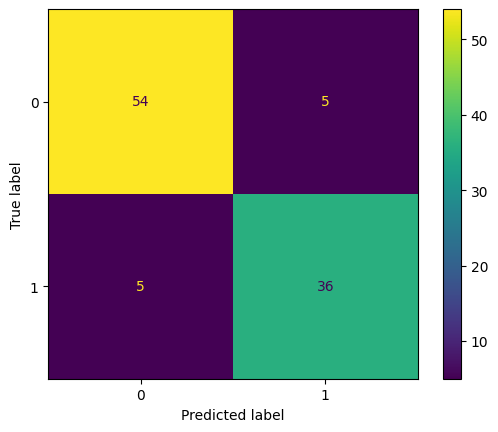

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [16]:
accuracy_score(y_test, y_pred)

0.9

In [17]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



#Step:10

Sample Prediction,Predict for new student values.

In [18]:


new_student = pd.DataFrame(
    [[4, 322, 110, 3, 3.5, 2.5, 8.67, 1]],
    columns=X.columns
)
classifier.predict(new_student)[0]


np.int64(1)

#Step:11

Decision Tree Visualization,Show decision tree structure.

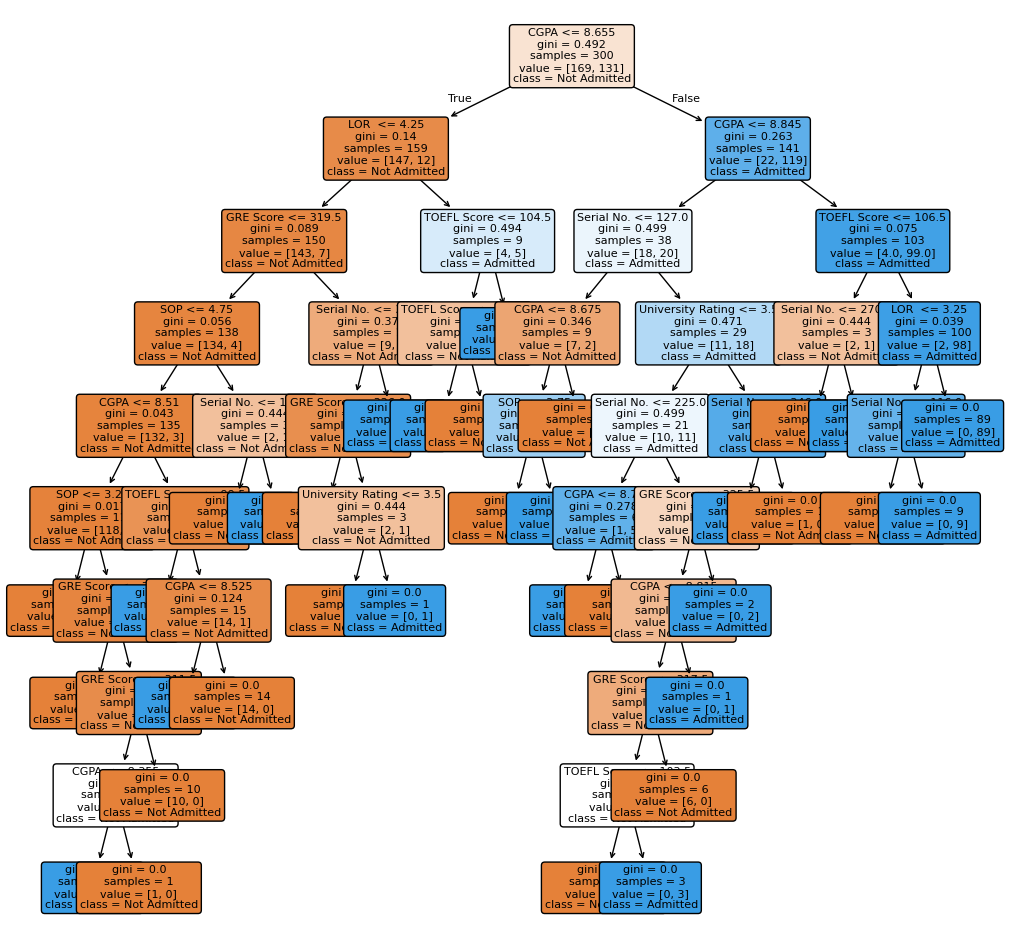

In [19]:


from sklearn.tree import plot_tree

plt.figure(figsize=(12,12))
plot_tree(
    classifier,
    fontsize=8,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=['Not Admitted', 'Admitted']
)
plt.show()




#Step 12:  

#Conclusion
The Decision Tree model successfully predicted graduate admissions with an accuracy of 99% on the test set. Key indicators such as CGPA and GRE scores played a significant role in the model's decisions.

